## Contextualización

En este notebook se va a continuar con lo tratado en el incial.  
Se parte del df con todas las variables ya limpias y se procede a realizar:
- La división entre train y test
- El análisis univariable
- El análisis vibariable con respecto a la target.
- La selección de las features que se tendrán en cuenta para el modelo.

## Importación librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

from EDA_function_tools import *
from toolbox_DS import *

## Carga de datos

In [2]:
# Cargo el archivo de train ya limpio y modelado
df = pd.read_csv('./data/df_final_precios_ordenadores.csv', index_col=0)
df.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution_disc,Pantalla_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu Type,Gpu_Brand_disc,GPU_model_disc,storage_type_disc
id,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,0,1,3,4,4,Dedicated,0,2,1
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,0,1,0,0,0,Unknown,1,0,1
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,3,1,2,3,3,Unknown,1,2,3
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,9,4,3,6,6,Dedicated,2,10,3
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,3,1,2,1,4,Unknown,1,2,3
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,3,1,3,4,4,Dedicated,2,3,3
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,3,1,1,0,0,Unknown,1,2,3
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,3,1,3,6,6,Dedicated,2,3,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 912 non-null    object 
 1   TypeName                912 non-null    object 
 2   Inches                  912 non-null    float64
 3   Ram                     912 non-null    int64  
 4   OpSys                   912 non-null    object 
 5   Weight                  912 non-null    float64
 6   Price_euros             912 non-null    float64
 7   Resolution_disc         912 non-null    int64  
 8   Pantalla_disc           912 non-null    int64  
 9   Family_disc             912 non-null    int64  
 10  Clock_speed_disc        912 non-null    int64  
 11  Modelo_procesador_disc  912 non-null    int64  
 12  Gpu Type                912 non-null    object 
 13  Gpu_Brand_disc          912 non-null    int64  
 14  GPU_model_disc          912 non-null    int6

## Listas de variables numéricas y categóricas

In [4]:
features_num = df.select_dtypes(['int','float']).columns.tolist()
features_cat = df.select_dtypes(['object','category']).columns.tolist()

In [5]:
features_num

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'Gpu_Brand_disc',
 'GPU_model_disc',
 'storage_type_disc']

In [6]:
features_cat

['Company', 'TypeName', 'OpSys', 'Gpu Type']

In [7]:
df[features_cat]

,Company,TypeName,OpSys,Gpu Type
id,,,,
268,Dell,Notebook,Windows 10,Dedicated
347,Asus,Notebook,Windows 10,Unknown
353,Toshiba,Notebook,Windows 7,Unknown
578,Dell,Gaming,Windows 10,Dedicated
42,Dell,Ultrabook,Windows 7,Unknown
...,...,...,...,...
89,Acer,2 in 1 Convertible,Chrome OS,Unknown
716,Toshiba,Notebook,Windows 10,Unknown
517,Acer,Notebook,Windows 10,Dedicated


## Análisis univariable

### Categóricas

Para Company
*************************


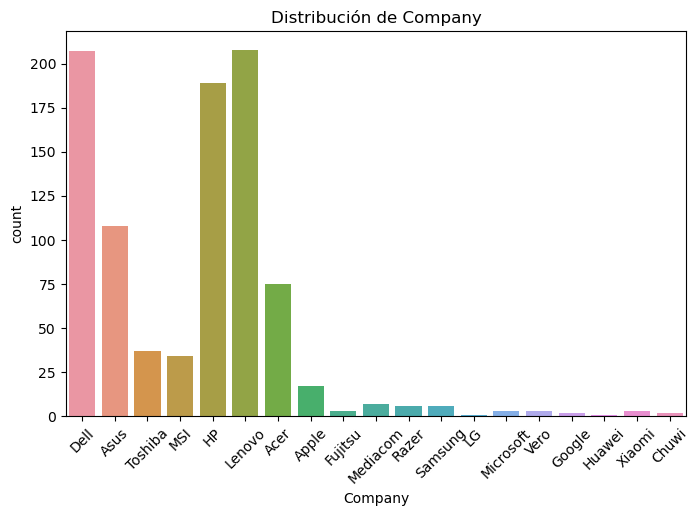

Frecuencia de categorías en Company:
Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

Porcentaje de categorías en Company:
Company
Lenovo       22.81
Dell         22.70
HP           20.72
Asus         11.84
Acer          8.22
Toshiba       4.06
MSI           3.73
Apple         1.86
Mediacom      0.77
Razer         0.66
Samsung       0.66
Fujitsu       0.33
Microsoft     0.33
Vero          0.33
Xiaomi        0.33
Google        0.22
Chuwi         0.22
LG            0.11
Huawei        0.11
Name: proportion, dtype: float64

La moda es Lenovo con una frecuencia de 208
Proporción de la moda: 22.81%

Para TypeName
*************************


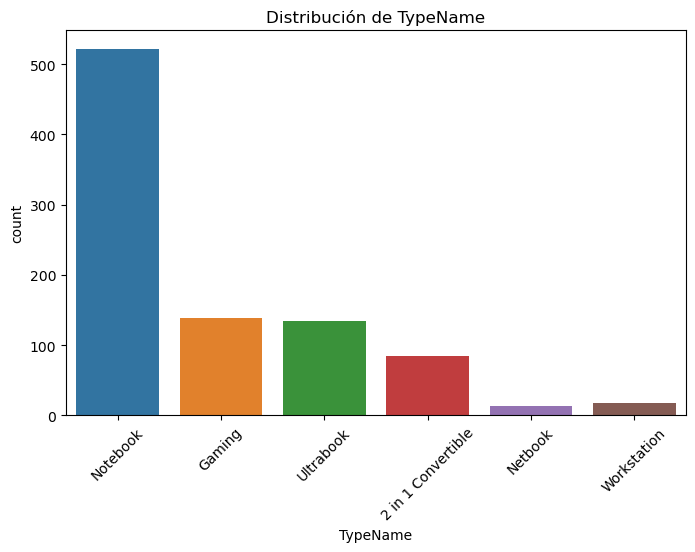

Frecuencia de categorías en TypeName:
TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

Porcentaje de categorías en TypeName:
TypeName
Notebook              57.24
Gaming                15.13
Ultrabook             14.80
2 in 1 Convertible     9.32
Workstation            1.97
Netbook                1.54
Name: proportion, dtype: float64

La moda es Notebook con una frecuencia de 522
Proporción de la moda: 57.24%

Para OpSys
*************************


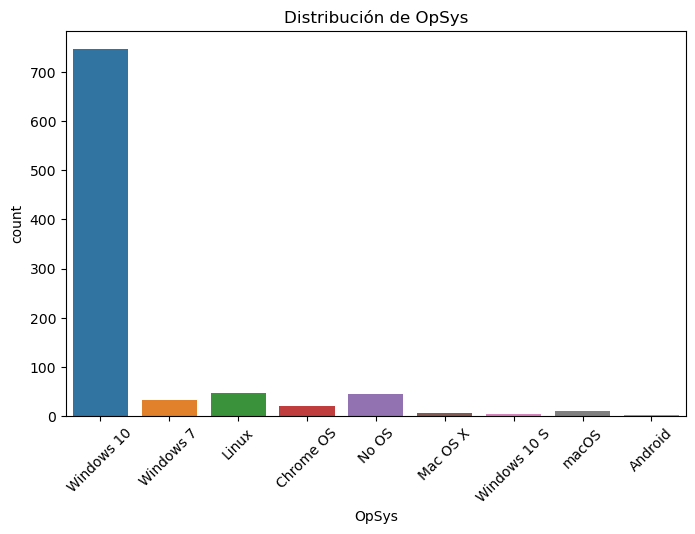

Frecuencia de categorías en OpSys:
OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

Porcentaje de categorías en OpSys:
OpSys
Windows 10      81.80
Linux            5.15
No OS            4.82
Windows 7        3.51
Chrome OS        2.19
macOS            1.21
Mac OS X         0.66
Windows 10 S     0.44
Android          0.22
Name: proportion, dtype: float64

La moda es Windows 10 con una frecuencia de 746
Proporción de la moda: 81.80%

Para Gpu Type
*************************


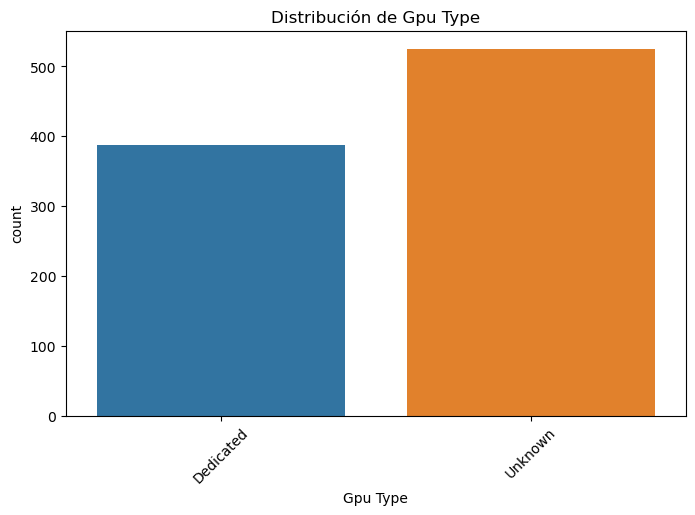

Frecuencia de categorías en Gpu Type:
Gpu Type
Unknown      525
Dedicated    387
Name: count, dtype: int64

Porcentaje de categorías en Gpu Type:
Gpu Type
Unknown      57.57
Dedicated    42.43
Name: proportion, dtype: float64

La moda es Unknown con una frecuencia de 525
Proporción de la moda: 57.57%



In [8]:
analisis_univariable_categoricas(df,features_cat)

### Numéricas

Para Inches
*************************


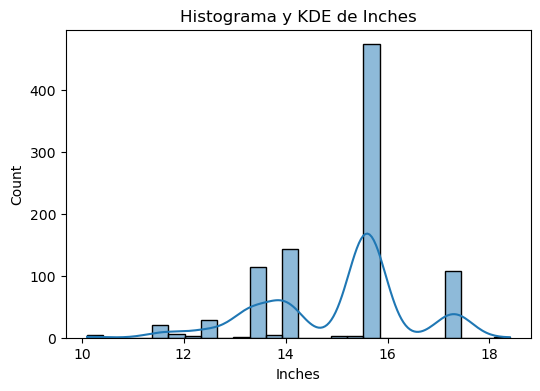

count    912.00
mean      15.01
std        1.41
min       10.10
25%       14.00
50%       15.60
75%       15.60
max       18.40
Name: Inches, dtype: float64

La moda es 15.60, el coeficiente de variación es 9.40% y el IQR es 1.60

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 0.09. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=59.04

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Ram
*************************


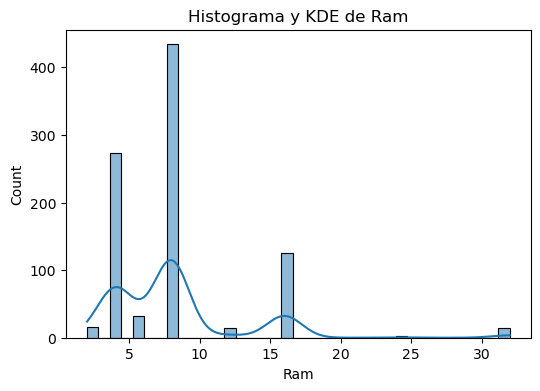

count    912.00
mean       8.19
std        4.90
min        2.00
25%        4.00
50%        8.00
75%        8.00
max       32.00
Name: Ram, dtype: float64

La moda es 8.00, el coeficiente de variación es 59.84% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.18, valores extendidos a la derecha

Curtosis: 6.92. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=81.66

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 16 y suponen en proporción 1.75%

La variable Ram puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.92, asimetria=2.18

Para Weight
*************************


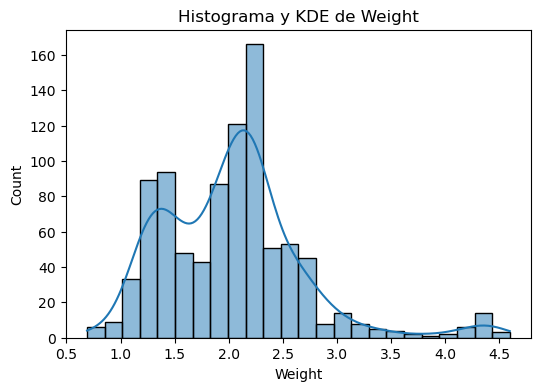

count    912.00
mean       2.03
std        0.65
min        0.69
25%        1.50
50%        2.04
75%        2.30
max        4.60
Name: Weight, dtype: float64

La moda es 2.20, el coeficiente de variación es 32.17% y el IQR es 0.80

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.13, valores extendidos a la derecha

Curtosis: 2.59. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=12.72

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Price_euros
*************************


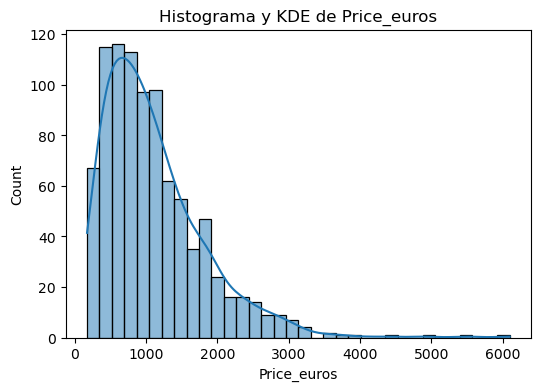

count     912.00
mean     1108.12
std       714.60
min       174.00
25%       589.00
50%       949.00
75%      1458.50
max      6099.00
Name: Price_euros, dtype: float64

La moda es 1099.00, el coeficiente de variación es 64.49% y el IQR es 869.50

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.72, valores extendidos a la derecha

Curtosis: 5.47. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=22.96

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.44%

La variable Price_euros puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=5.47, asimetria=1.72

Para Resolution_disc
*************************


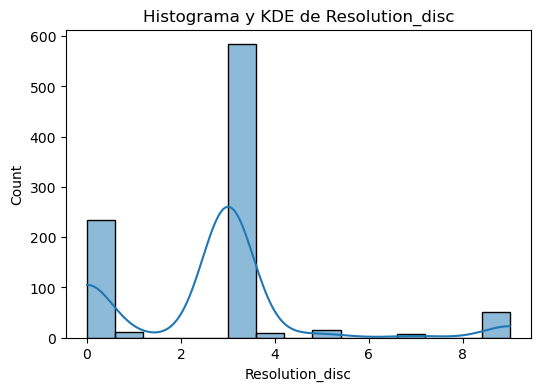

count    912.00
mean       2.62
std        2.10
min        0.00
25%        0.00
50%        3.00
75%        3.00
max        9.00
Name: Resolution_disc, dtype: float64

La moda es 3.00, el coeficiente de variación es 80.43% y el IQR es 3.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.17, valores extendidos a la derecha

Curtosis: 2.54. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=111.70

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Pantalla_disc
*************************


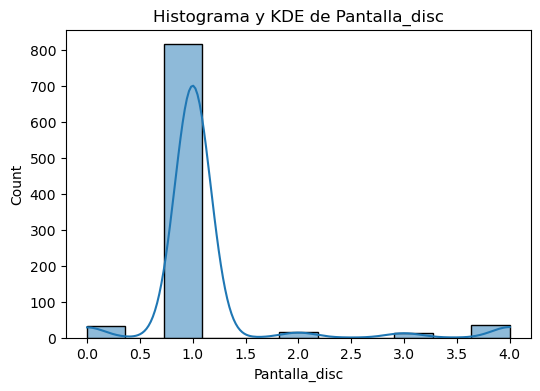

count    912.00
mean       1.12
std        0.66
min        0.00
25%        1.00
50%        1.00
75%        1.00
max        4.00
Name: Pantalla_disc, dtype: float64

La moda es 1.00, el coeficiente de variación es 58.74% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.30, valores extendidos a la derecha

Curtosis: 11.83. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=264.90

Outliers:
Los outliers inferiores son 33 y suponen en proporción 3.62%

Los outliers superiores son 64 y suponen en proporción 7.02%

La variable Pantalla_disc puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=11.83, asimetria=3.3

Para Family_disc
*************************


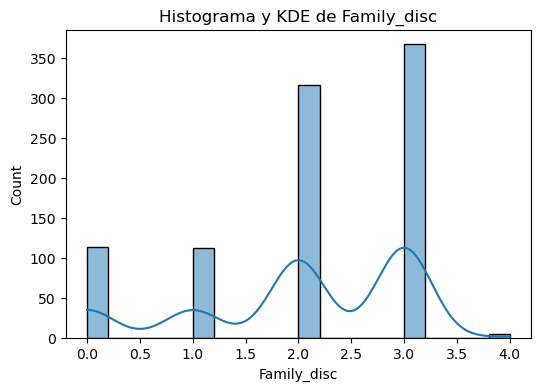

count    912.00
mean       2.04
std        1.02
min        0.00
25%        2.00
50%        2.00
75%        3.00
max        4.00
Name: Family_disc, dtype: float64

La moda es 3.00, el coeficiente de variación es 49.93% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: -0.76, valores extendidos a la izquierda

Curtosis: -0.49. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=65.06

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Clock_speed_disc
*************************


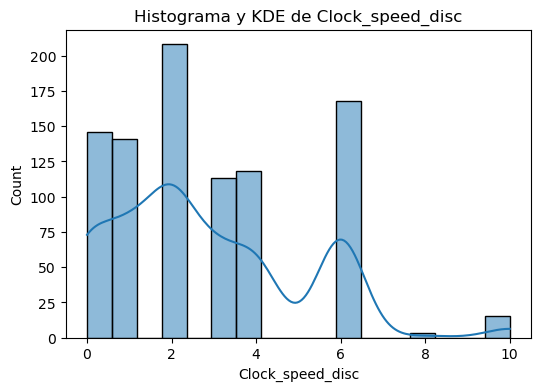

count    912.00
mean       2.80
std        2.22
min        0.00
25%        1.00
50%        2.00
75%        4.00
max       10.00
Name: Clock_speed_disc, dtype: float64

La moda es 2.00, el coeficiente de variación es 79.38% y el IQR es 3.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.77, valores extendidos a la derecha

Curtosis: 0.22. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=28.48

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Modelo_procesador_disc
*************************


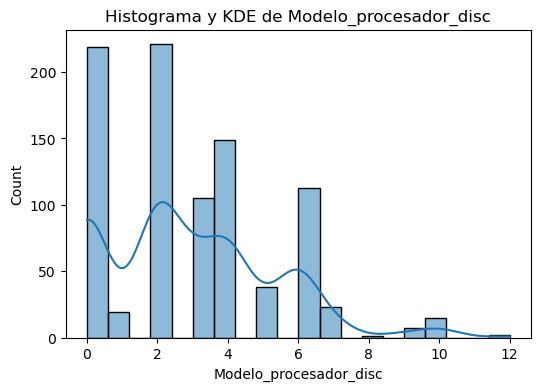

count    912.00
mean       2.90
std        2.37
min        0.00
25%        1.00
50%        2.00
75%        4.00
max       12.00
Name: Modelo_procesador_disc, dtype: float64

La moda es 2.00, el coeficiente de variación es 81.70% y el IQR es 3.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.70, valores extendidos a la derecha

Curtosis: 0.34. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=23.07

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Gpu_Brand_disc
*************************


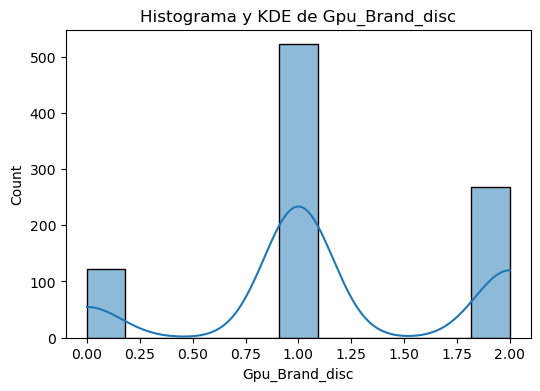

count    912.00
mean       1.16
std        0.63
min        0.00
25%        1.00
50%        1.00
75%        2.00
max        2.00
Name: Gpu_Brand_disc, dtype: float64

La moda es 1.00, el coeficiente de variación es 54.68% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.59. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0002

Prueba Anderson-Darling: estadístico=93.94

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para GPU_model_disc
*************************


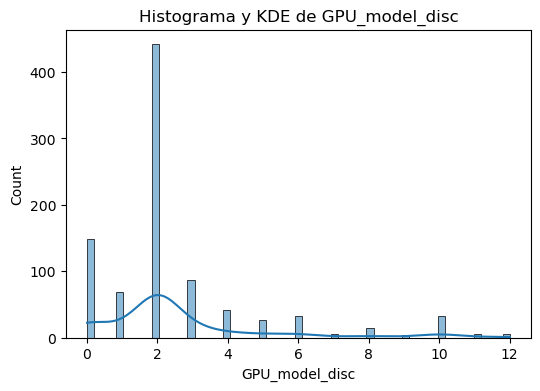

count    912.00
mean       2.56
std        2.40
min        0.00
25%        2.00
50%        2.00
75%        3.00
max       12.00
Name: GPU_model_disc, dtype: float64

La moda es 2.00, el coeficiente de variación es 93.70% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.88, valores extendidos a la derecha

Curtosis: 3.67. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=82.77

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 66 y suponen en proporción 7.24%

La variable GPU_model_disc puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.67, asimetria=1.88

Para storage_type_disc
*************************


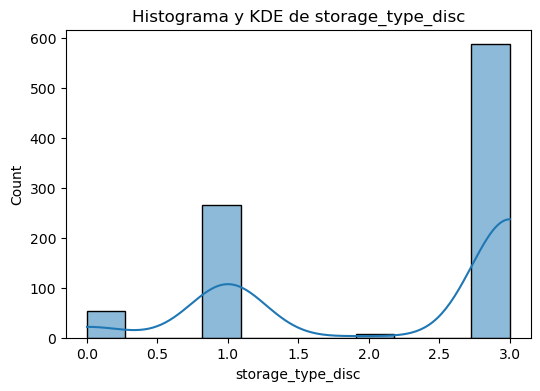

count    912.00
mean       2.24
std        1.05
min        0.00
25%        1.00
50%        3.00
75%        3.00
max        3.00
Name: storage_type_disc, dtype: float64

La moda es 3.00, el coeficiente de variación es 47.14% y el IQR es 2.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: -0.78, valores extendidos a la izquierda

Curtosis: -1.09. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=154.53

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

features_log: ['Ram', 'Price_euros', 'Pantalla_disc', 'GPU_model_disc']

features_no_log: ['Inches', 'Weight', 'Resolution_disc', 'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu_Brand_disc', 'storage_type_disc']


,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
Inches,0.0,0.0000,59.04,-0.49,0.09,0.00,0.00,False
Ram,0.0,0.0000,81.66,2.18,6.92,0.00,1.75,True
Weight,0.0,0.0000,12.72,1.13,2.59,0.00,0.00,False
Price_euros,0.0,0.0000,22.96,1.72,5.47,0.00,0.44,True
Resolution_disc,0.0,0.0000,111.70,1.17,2.54,0.00,0.00,False
Pantalla_disc,0.0,0.0000,264.90,3.30,11.83,3.62,7.02,True
Family_disc,0.0,0.0000,65.06,-0.76,-0.49,0.00,0.00,False
Clock_speed_disc,0.0,0.0000,28.48,0.77,0.22,0.00,0.00,False
Modelo_procesador_disc,0.0,0.0000,23.07,0.70,0.34,0.00,0.00,False
Gpu_Brand_disc,0.0,0.0002,93.94,-0.15,-0.59,0.00,0.00,False


In [9]:
analisis_univariable_numericas(df,features_num)

## Análisis Bivariable

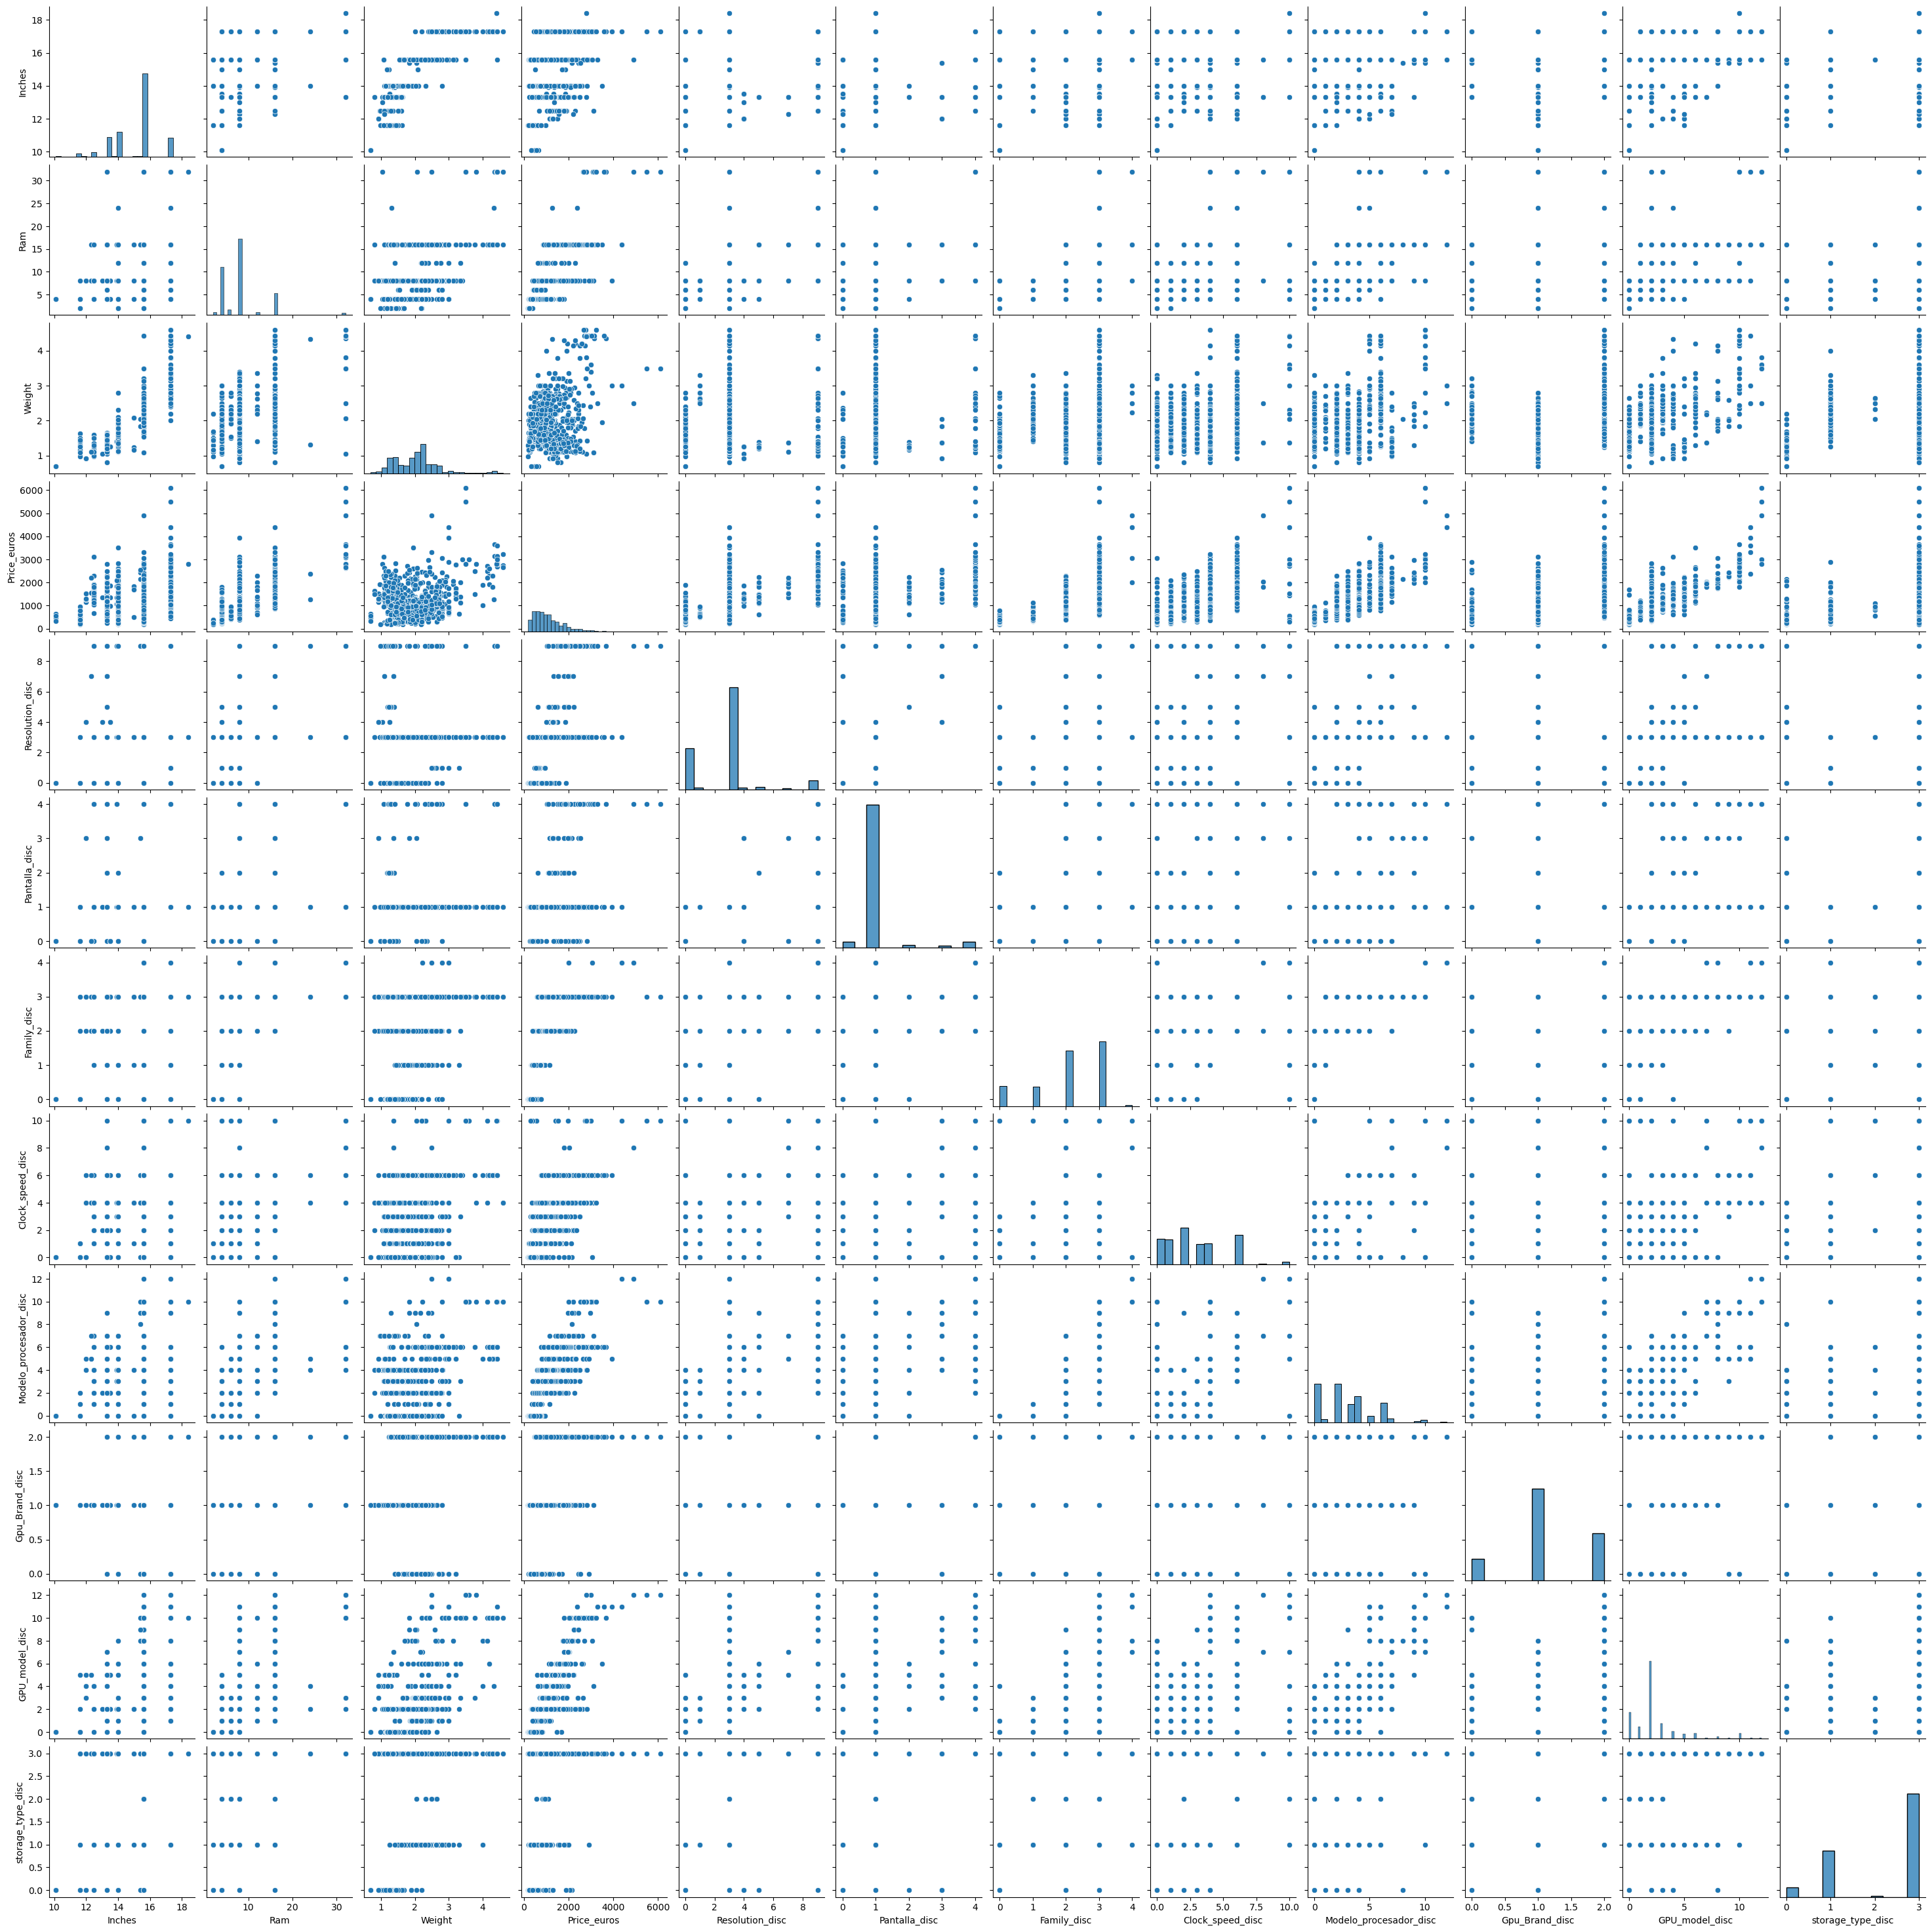

In [10]:
sns.pairplot(df)

In [11]:
# Saco la target de la listas de features
features_num.remove('Price_euros')


### Categóricas con target

### Numéricas con target


Matriz de correlación con la variable target:
Modelo_procesador_disc    0.784362
GPU_model_disc            0.771843
Ram                       0.747748
Family_disc               0.652861
Clock_speed_disc          0.645946
Resolution_disc           0.623873
storage_type_disc         0.485097
Pantalla_disc             0.398831
Gpu_Brand_disc            0.375958
Weight                    0.231864
Inches                    0.077798
Name: Price_euros, dtype: float64



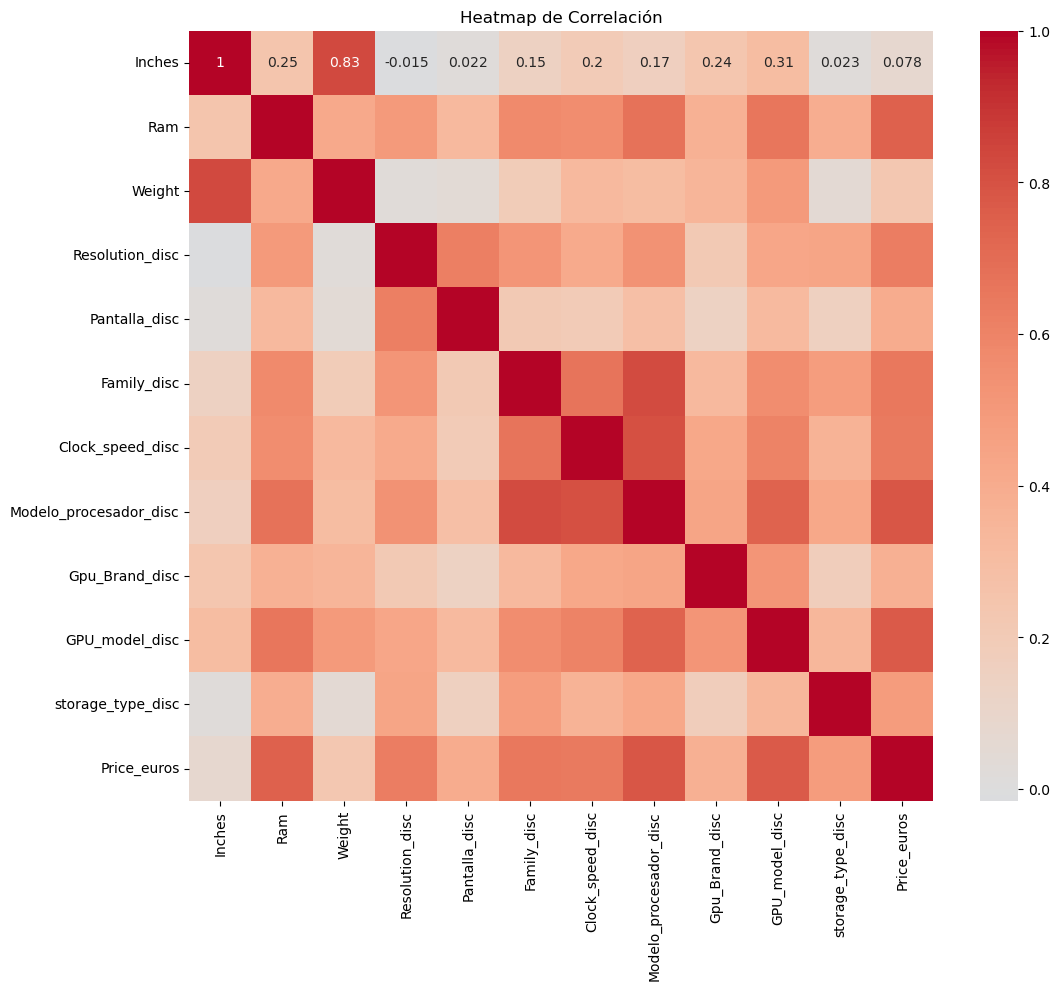

Variables con correlación por debajo del 20%: ['Inches']
Variables con correlación por encima del 20%: ['Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc', 'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc', 'Price_euros']

Prueba de correlación para Inches vs Price_euros
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: -0.05
p-valor: 0.122
La variable Inches no está significativamente asociada con Price_euros (p >= 0.05 o correlación < 0.2).

Prueba de correlación para Ram vs Price_euros
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: 0.76
p-valor: 0.000
La variable Ram está significativamente asociada con Price_euros (p < 0.05 y correlación >= 0.2). Podría ser útil para el modelo.

Prueba de correlación para Weight vs Price_euros
****************************************
Prueba de correlación (Pearson):
Estadíst

{'significant_vars': ['Ram',
  'Weight',
  'Resolution_disc',
  'Pantalla_disc',
  'Family_disc',
  'Clock_speed_disc',
  'Modelo_procesador_disc',
  'Gpu_Brand_disc',
  'GPU_model_disc',
  'storage_type_disc'],
 'high_vif_vars': ['Ram',
  'Weight',
  'Resolution_disc',
  'Pantalla_disc',
  'Family_disc',
  'Clock_speed_disc',
  'Modelo_procesador_disc',
  'Gpu_Brand_disc',
  'GPU_model_disc',
  'storage_type_disc'],
 'high_corr_vars': ['Modelo_procesador_disc'],
 'low_corr_vars': ['Family_disc', 'Clock_speed_disc']}

In [12]:
analisis_bivariable_numericas_numerica(df,'Price_euros',features_num)

Dado que se han obtenido las variables discretizadas en base al importe de la mediana, he conseguido tener variables numéricas que tienen una alta correlación con la variable target Prices_euros. 
Al parecer, la variable Modelo_procesador_disc y Family_disc tienen una alta correlación entre ellas, de las dos, la que más correlación tiene con la variable target Prices_euros es Modelo_procesador_disc

## Selección de features y base line

In [13]:
# Selección de features por medios visuales
# Voy a incluir todas menos la variable Inches que apenas tiene correlación con la variable target Prices_euros
features_visual = df.drop(columns='Inches').columns.tolist()
features_visual

['Company',
 'TypeName',
 'Ram',
 'OpSys',
 'Weight',
 'Price_euros',
 'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'Gpu Type',
 'Gpu_Brand_disc',
 'GPU_model_disc',
 'storage_type_disc']